In [1]:
import os
import pickle
import torch
import matplotlib.pyplot as plt

In [2]:
def get_auc_curve(ave_success_rate_plot_overlap, valid_sequence):
    ave_success_rate_plot_overlap = ave_success_rate_plot_overlap[valid_sequence, :, :]
    auc_curve = ave_success_rate_plot_overlap.mean(-1) * 100.0 # TODO 样本的均值
    auc = auc_curve.mean(-1)

    return auc_curve, auc

ori auc:  68.97083282470703
run74 auc:  68.64736938476562


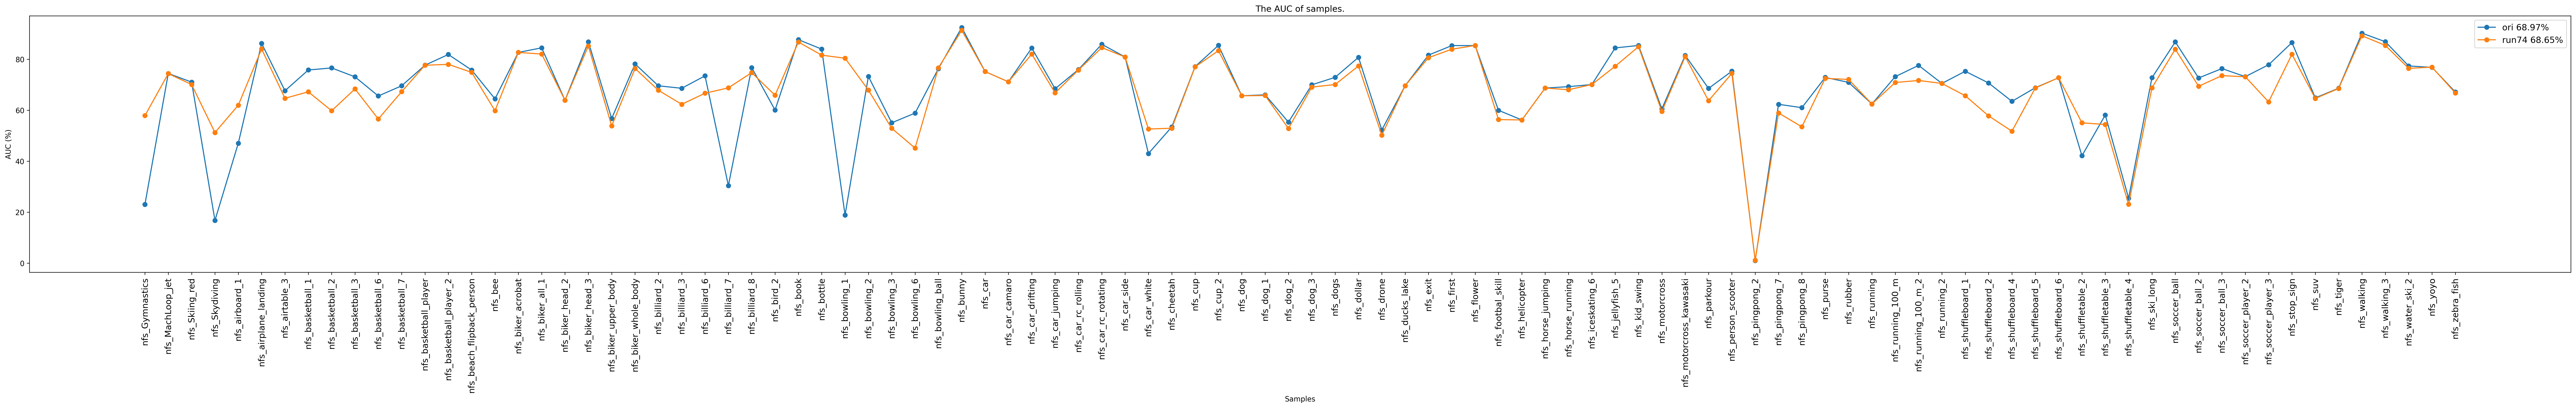

In [6]:
root = '/data/guohua/BeiJing/code/VideoX.back/SeqTrack/test/result_plots'
tag = '100' # 1120, 280, 20, 16, 4 123 100
dataset_name = 'nfs' # lasot uav nfs
runid = '74'
# data
with open(os.path.join(root, dataset_name, f'eval_data_run999_{tag}.pkl'), 'rb') as f:
    eval_data_ori = pickle.load(f)
with open(os.path.join(root, dataset_name, f'eval_data_run{runid.zfill(2)}_{tag}.pkl'), 'rb') as f:
    eval_data_exp = pickle.load(f)

sample_list = eval_data_exp['sequences']
# ori
index = [eval_data_ori['sequences'].index(s) for s in sample_list]
valid_sequence = torch.tensor(eval_data_ori['valid_sequence'], dtype=torch.bool)[index]
ave_success_rate_plot_overlap = torch.tensor(eval_data_ori['ave_success_rate_plot_overlap'])[index]
auc_curve_ori, auc_ori = get_auc_curve(ave_success_rate_plot_overlap, valid_sequence)
# exp
valid_sequence = torch.tensor(eval_data_exp['valid_sequence'], dtype=torch.bool)
ave_success_rate_plot_overlap = torch.tensor(eval_data_exp['ave_success_rate_plot_overlap'])
auc_curve_exp, auc_exp = get_auc_curve(ave_success_rate_plot_overlap, valid_sequence)

print(f'ori auc: ', auc_curve_ori.mean().item())
print(f'run{runid.zfill(2)} auc: ', auc_curve_exp.mean().item())

# 创建图
plt.figure(figsize=(50, 8), dpi=300)

plt.plot(sample_list, auc_curve_ori, 'o-', label=f'ori {auc_curve_ori.mean().item():.2f}%')
plt.plot(sample_list, auc_curve_exp, 'o-', label=f'run{runid.zfill(2)} {auc_curve_exp.mean().item():.2f}%')

# 添加标题和标签
plt.title('The AUC of samples.')
plt.xlabel('Samples')
plt.ylabel('AUC (%)')

# 旋转x轴的标签以便更好的显示
plt.xticks(rotation=90, fontsize=12) # rotation=90, 

# 显示图例
plt.legend(fontsize=12)

# 显示图形
plt.tight_layout()
plt.show()